# Worksheet 08

Name: Jiahang Li 
UID: U00295086

### Topics

- Clustering Aggregation
- Singular Value Decomposition

### Clustering Aggregation

| Point | C | P |
|-------|---|---|
| A     | 0 | a |
| B     | 0 | b |
| C     | 2 | b |
| D     | 1 | c |
| E     | 1 | d |

a) Fill in the following table where for each pair of points determine whether C and P agree or disagree on how to cluster that pair.

| Pair | Disagreement |
|------|--------------|
| A  B |      1       |
| A  C |      0       |
| A  D |      0       |
| A  E |      0       |
| B  C |      1       |
| B  D |      0       |
| B  E |      0       |
| C  D |      0       |
| C  E |      0       |
| D  E |      1       |


As datasets become very large, this process can become computationally challenging.

b) Given N points, what is the formula for the number of unique pairs of points one can create?

(N * (N-1)) / 2

Assume that clustering C clusters all points in the same cluster and clustering P clusters points as such:

| Point | P |
|-------|---|
| A     | 0 |
| B     | 0 |
| C     | 0 |
| D     | 1 |
| E     | 1 |
| F     | 2 |
| G     | 2 |
| H     | 2 |
| I     | 2 |

c) What is the maximum number of disagreements there could be for a dataset of this size? (use the formula from b)?

Using the table of points and cluster assignments provided, we can count the number of unique pairs of points for each cluster separately:

Cluster 0: There are 3 points (A, B, and C) in this cluster, so the number of unique pairs is:

(3 choose 2) = 3(2)/2 = 3

Cluster 1: There are 2 points (D and E) in this cluster, so the number of unique pairs is:

(2 choose 2) = 2(1)/2 = 1

Cluster 2: There are 4 points (F, G, H, and I) in this cluster, so the number of unique pairs is:

(4 choose 2) = 4(3)/2 = 6

Therefore, the total number of unique pairs of points that can be created from these clusters is:

3 + 1 + 6 = 10

d) If we look at cluster 0. There are (3 x 2) / 2 = 3 pairs that agree with C (since all points in C are in the same cluster). For each cluster, determine how many agreements there are. How many total agreements are there? How many disagreements does that mean there are between C and P?

In cluster 0, all points are in the same cluster according to clustering algorithm C. Therefore, there are (3 choose 2) = (3 x 2) / 2 = 3 pairs of points that agree with C.

For each cluster, we can count the number of pairs of points that agree with C and P:

Cluster 0: 3 agreements with C, 3 agreements with P Cluster 1: 1 agreement with C, 1 agreement with P Cluster 2: 6 agreements with C, 6 agreements with P To find the total number of agreements, we simply sum up the number of agreements for each cluster:

3 + 1 + 6 = 10

To find the number of disagreements, we can subtract the number of agreements from the total number of pairs of points, which we calculated in a previous answer to be:

10 (total number of pairs) - 10 (total number of agreements) = 0

Therefore, there are no disagreements between C and P in this case. This means that C and P agree on how to cluster all pairs of points.

e) Assuming that filtering the dataset by cluster number is a computationally easy operation, describe an algorithm inspired by the above process that can efficiently compute disagreement distances on large datasets.

- Divide the dataset into clusters using two different clustering algorithms (e.g., C and P).
- For each pair of clusters, compute the number of pairs of points that agree with both algorithms (i.e., the number of agreements).
- Calculate the total number of agreements by summing up the number of agreements for each pair of clusters.
- Calculate the total number of pairs of points in the dataset using the formula (N choose 2) = N(N-1)/2, where N is the total number of points in the dataset.
- Calculate the number of disagreements by subtracting the total number of agreements from the total number of pairs of points.
- Compute the disagreement distance as the ratio of the number of disagreements to the total number of pairs of points.

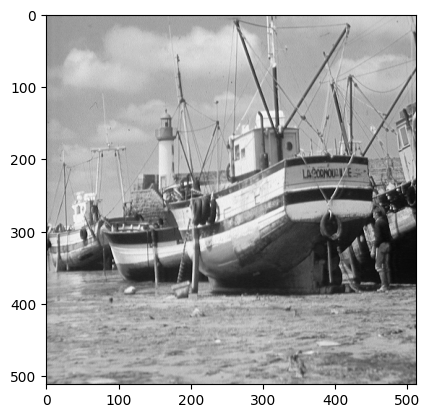

In [3]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

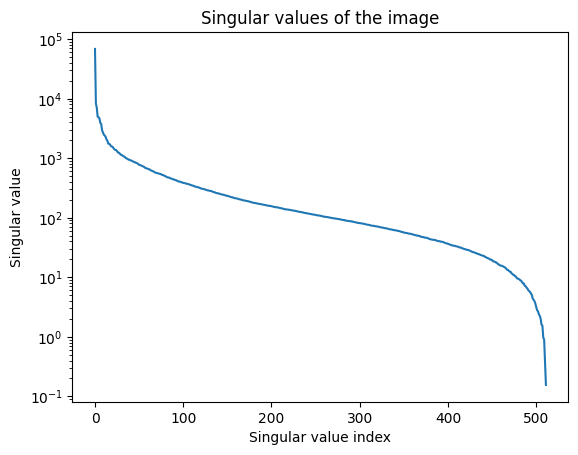

In [4]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.semilogy(s)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Singular values of the image')
plt.show()

Notice you can get the image back by multiplying the matrices back together:

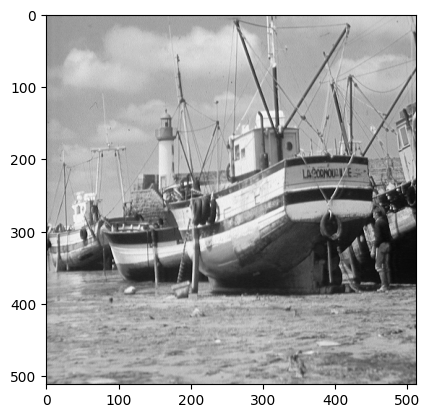

In [5]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [7]:
scopy = np.zeros_like(s)
scopy[0] = s[0]


k = len(s) 
Ak = np.dot(u[:, :k] * scopy[:k], vt[:k, :])

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

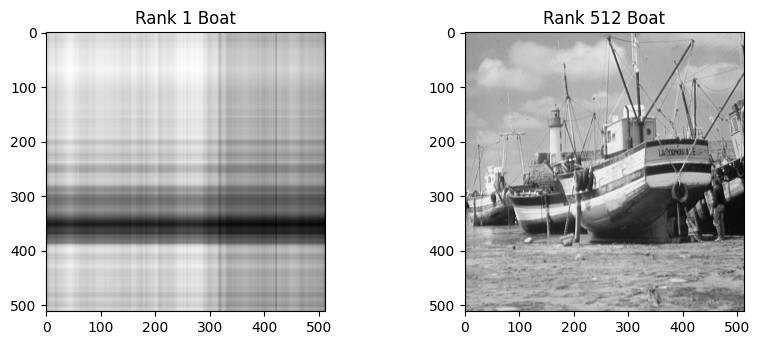

In [8]:
boat_app = np.dot(u, np.dot(np.diag(scopy), vt))

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

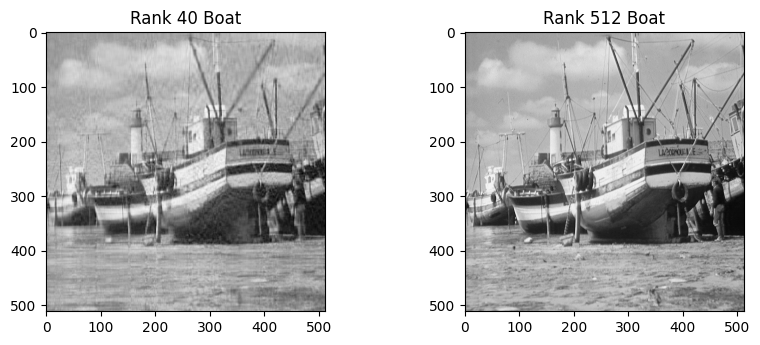

In [11]:
scopy = np.zeros_like(s)
scopy[:40] = s[:40]


k = len(s) 
Ak = np.dot(u[:, :k] * scopy[:k], vt[:k, :])

boat_app = np.dot(u, np.dot(np.diag(scopy), vt))

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Next, we generate random points on the Euclidean plane:

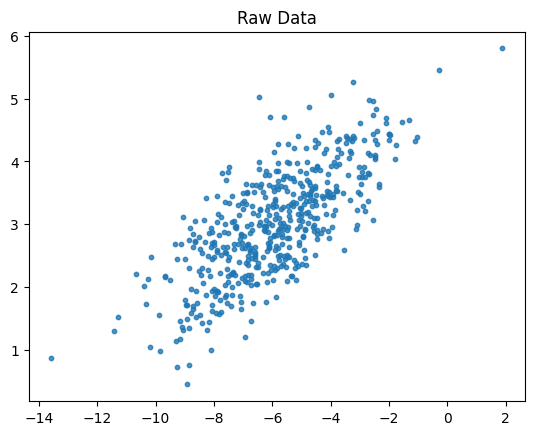

In [9]:
n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

e) Mean-center the data and plot it.

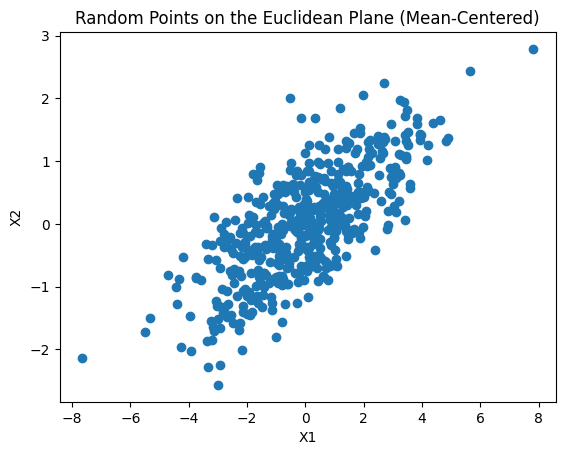

In [12]:
X_centered = X - np.mean(X, axis=0)

plt.scatter(X_centered[:, 0], X_centered[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Random Points on the Euclidean Plane (Mean-Centered)')
plt.show()

f) Decompose the mean-centered data using SVD. How many singular values do you expect there will be? Why?

In [13]:
U, S, Vt = np.linalg.svd(X_centered)

 there will be at most two non-zero singular values for this data, since the data is two-dimensional.

g) Appoximating the data using either the first or second singular value will result in a 1-dimensional data set (i.e. it fits on a line). If you only had a line to approximate the above data, where would it lie on the plot? explain.

It depends on which singular value we choose to use for the approximation.

If we choose to approximate the data using only the first singular value, then the line that best approximates the data would lie in the direction of the first left singular vector, corresponding to the first singular value. This direction is the direction of maximum variance in the data. Since the data is mean-centered, this direction passes through the origin. Therefore, the line would pass through the origin of the plot.

If we choose to approximate the data using only the second singular value, then the line that best approximates the data would lie in the direction of the second left singular vector, corresponding to the second singular value. This direction is orthogonal to the direction of the first left singular vector, and represents the direction of second highest variance in the data. Since the data is mean-centered, this direction does not necessarily pass through the origin. Therefore, the line would not necessarily pass through the origin of the plot. Instead, it would be shifted in the direction of the mean of the data.

h) Approximate the mean-centered data using only the first singular value. Plot both the mean-centered data and the approximation on the same plot using two different colors.

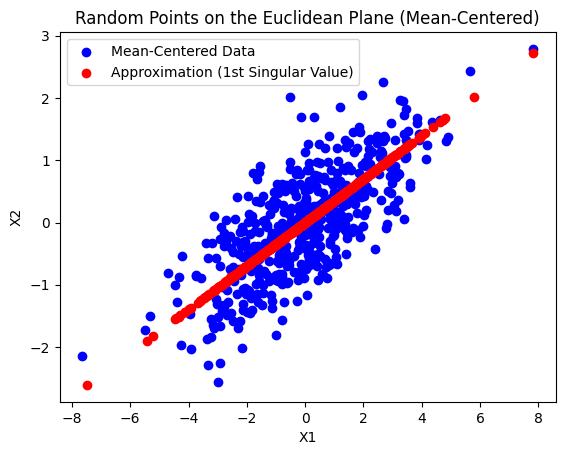

In [14]:

# Approximate the data using only the first singular value
U, S, Vt = np.linalg.svd(X_centered)
X_approx = np.dot(U[:, :1], np.dot(np.diag(S[:1]), Vt[:1, :]))

# Plot the mean-centered data and the approximation
plt.scatter(X_centered[:, 0], X_centered[:, 1], c='b', label='Mean-Centered Data')
plt.scatter(X_approx[:, 0], X_approx[:, 1], c='r', label='Approximation (1st Singular Value)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Random Points on the Euclidean Plane (Mean-Centered)')
plt.legend()
plt.show()

i) Repeat h) using only the second singular value. Comment on what you observe.

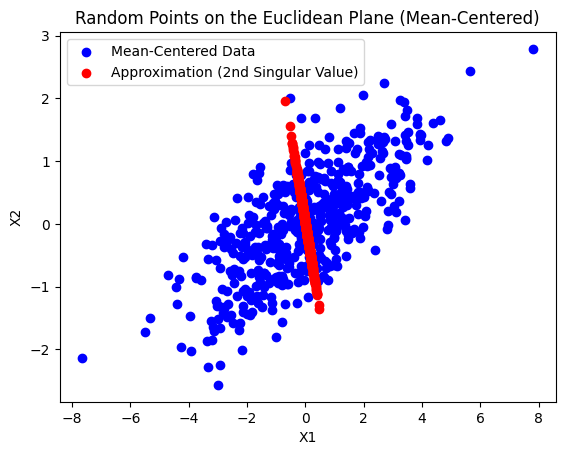

In [16]:
X_approx = np.dot(U[:, 1:2], np.dot(np.diag(S[1:2]), Vt[1:2, :]))

# Plot the mean-centered data and the approximation
plt.scatter(X_centered[:, 0], X_centered[:, 1], c='b', label='Mean-Centered Data')
plt.scatter(X_approx[:, 0], X_approx[:, 1], c='r', label='Approximation (2nd Singular Value)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Random Points on the Euclidean Plane (Mean-Centered)')
plt.legend()
plt.show()

The approximation using only the second singular value is not as good as the approximation using only the first singular value. The line that best approximates the data in this case lies in the direction of the second left singular vector, which is perpendicular to the direction of the first left singular vector. Therefore, the approximation using only the second singular value does not capture the main trend in the data as well as the approximation using only the first singular value.
